# Processing Outdoor Files, Modified from Laura Yang

In [1]:
import pandas as pd
import numpy as np
import joblib
import json
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
import smps
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot
from smps.fit import LogNormal
import plotly as py
import pyarrow.feather as feather
sns.set("notebook", "ticks", palette='colorblind') 
%matplotlib inline

In [2]:
folder = '/Users/zahrashivji/Dropbox/Shivji/Final Data/Outdoor Files/'
input_raw = folder + 'EST_Roof_Raw.csv'
input_final = folder + 'EST_Roof_Final.csv'

In [3]:
#Load the raw file 
df1 = dd.read_csv(input_raw, parse_dates = ['timestamp','timestamp_local']).compute()

# load the final data 
df_final = dd.read_csv(input_final, parse_dates=['timestamp','timestamp_local']).compute()
df2 = df_final[['raw_table_id','pm1','pm25','pm10']]

# merge the files
df = df1.merge(df2, left_on='id',right_on='raw_table_id')

In [4]:
#Drop the duplicated measurements
df = df.drop_duplicates(subset=['timestamp'])

In [5]:
# del unneccesary columns
del df['lat']
del df['lon']
del df['sample_pres'], df['device_state'], df['id']

In [6]:
# Set the index to be the timestamp_local
df.set_index("timestamp_local", inplace=True) 

# Only keep un-flagged data
df = df.query("flag == 0")

#Sort the timestamp_local so that it starts from lowest to highest date
df = df.sort_index()

#Specify start and end date of interest
t0= '2020-11-05'
tf= "2021-01-01"

# Keep only data between start and stop 
df = df[t0:tf]

In [7]:
# export the data both to csv
df.to_csv(folder + 'MODPM-raw-final-merged.csv')

In [7]:
# only keep rows where the values are positive
df = df[df['bin0'] >= 0.]
df = df[df['bin1'] >= 0.]
df = df[df['bin2'] >= 0.]
df = df[df['bin3'] >= 0.]
df = df[df['bin4'] >= 0.]
df = df[df['bin5'] >= 0.]
df = df[df['bin6'] >= 0.]
df = df[df['bin7'] >= 0.]
df = df[df['bin8'] >= 0.]
df = df[df['bin9'] >= 0.]
df = df[df['bin10'] >= 0.]
df = df[df['bin11'] >= 0.]
df = df[df['bin12'] >= 0.]
df = df[df['bin13'] >= 0.]
df = df[df['bin14'] >= 0.]
df = df[df['bin15'] >= 0.]
df = df[df['bin16'] >= 0.]
df = df[df['bin17'] >= 0.]
df = df[df['bin18'] >= 0.]
df = df[df['bin19'] >= 0.]
df = df[df['bin20'] >= 0.]
df = df[df['bin21'] >= 0.]
df = df[df['bin22'] >= 0.]
df = df[df['bin23'] >= 0.]
df = df[df['pm1'] >= 0.]
df = df[df['pm25'] >= 0.]
df = df[df['pm10'] >= 0.]

# identify the columns to keep
cols_to_keep = ['sample_temp', 'sample_rh','pm1', 'pm25', 'pm10','bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5',
                'bin6','bin7','bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13',
                'bin14','bin15','bin16', 'bin17', 'bin18', 'bin19', 'bin20', 'bin21',
                'bin22','bin23' ,'neph_bin0', 'neph_bin1', 'neph_bin2', 'neph_bin3', 
                'neph_bin4', 'neph_bin5', 'pm1_env', 'pm25_env', 'pm10_env']

# keep only certain columns
df = df[cols_to_keep]
df.index = df.index.tz_localize(None)
df

,sample_temp,sample_rh,pm1,pm25,pm10,bin0,bin1,bin2,bin3,bin4,...,bin23,neph_bin0,neph_bin1,neph_bin2,neph_bin3,neph_bin4,neph_bin5,pm1_env,pm25_env,pm10_env
timestamp_local,,,,,,,,,,,,,,,,,,,,,
2020-11-05 00:00:45,13.24,52.77,19.3583,19.9848,23.8778,12.2497,1.0049,0.3348,0.0701,0.0522,...,0.0,2887.50,862.333,140.083,5.000,1.167,0.917,16.500,23.417,24.333
2020-11-05 00:01:45,13.23,52.88,19.9681,20.3273,21.3987,13.1604,1.2639,0.2947,0.0811,0.0467,...,0.0,2980.25,885.333,126.667,5.167,1.250,0.000,17.083,23.083,23.667
2020-11-05 00:02:45,13.22,52.72,20.1577,20.6313,22.3660,13.0594,1.1542,0.3421,0.0621,0.0730,...,0.0,3006.25,894.833,131.583,6.667,1.000,0.000,17.083,23.000,23.833
2020-11-05 00:03:45,13.20,52.73,21.4999,21.9641,22.8158,12.8799,1.1558,0.3468,0.0952,0.0391,...,0.0,3205.25,959.083,156.000,7.833,3.500,1.250,17.917,25.917,28.250
2020-11-05 00:04:45,13.20,52.47,18.8222,19.2573,22.1620,13.2664,1.2199,0.2923,0.0608,0.0568,...,0.0,2802.25,823.417,131.667,7.083,3.333,1.000,16.083,22.000,24.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 23:55:57,17.59,90.48,4.3183,5.3418,6.0599,16.5990,1.8958,0.3797,0.1183,0.1077,...,0.0,1444.25,443.500,85.500,3.333,2.333,1.333,8.417,12.000,13.500
2021-01-01 23:56:57,17.57,90.62,4.3877,5.1600,5.6302,15.5715,1.9537,0.4638,0.0956,0.1304,...,0.0,1479.00,445.667,79.000,2.583,0.833,0.417,8.333,12.250,12.833
2021-01-01 23:57:57,17.54,90.75,4.4391,5.2801,6.0384,16.6643,1.9652,0.3938,0.0942,0.1011,...,0.0,1516.25,456.083,84.167,1.333,0.333,0.000,8.667,12.500,12.583


In [8]:
# Resample to a 5min time-base
df_1min = df.resample("1min").mean()
df_1min.reset_index()
# df_1min.to_csv(folder + 'MODPM-final-1min.csv')

df_6min = df.resample("6min").mean()
df_6min.reset_index()
# df_6min.to_csv(folder + 'MODPM-final-6min.csv')
df_6min

,sample_temp,sample_rh,pm1,pm25,pm10,bin0,bin1,bin2,bin3,bin4,...,bin23,neph_bin0,neph_bin1,neph_bin2,neph_bin3,neph_bin4,neph_bin5,pm1_env,pm25_env,pm10_env
timestamp_local,,,,,,,,,,,,,,,,,,,,,
2020-11-05 00:00:00,13.211667,52.680000,20.044017,20.536850,22.584833,12.914967,1.151983,0.323933,0.071100,0.060450,...,0.0,2988.083333,889.138667,137.708333,6.388833,2.013833,0.652833,16.999833,23.639000,24.999833
2020-11-05 00:06:00,13.158333,52.618333,18.541850,19.061183,21.067967,12.583917,1.092117,0.309133,0.073817,0.069083,...,0.0,2762.541667,826.486167,121.916667,5.583333,1.708167,0.264000,15.222167,21.055500,22.125000
2020-11-05 00:12:00,13.181667,52.328333,17.709983,18.128367,19.410350,12.070900,1.110283,0.294350,0.068950,0.059600,...,0.0,2633.541667,791.124833,126.013833,5.889000,2.000000,0.277833,15.166500,21.041833,22.180500
2020-11-05 00:18:00,13.176667,51.965000,16.624933,17.148300,18.497650,11.691667,1.097817,0.309200,0.066183,0.066250,...,0.0,2466.291667,738.250000,116.736000,6.264000,1.986167,0.638833,14.027667,19.986000,21.291667
2020-11-05 00:24:00,13.220000,51.506667,13.881683,14.361900,15.765650,11.416633,1.047700,0.283717,0.065817,0.062667,...,0.0,2052.791667,611.458333,102.291500,6.153000,2.236167,0.777667,11.125167,16.333333,17.847167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 23:30:00,17.923333,89.826667,4.543550,5.370967,6.144533,15.742250,1.868767,0.422067,0.104517,0.094350,...,0.0,1455.125000,439.319500,86.930667,2.208333,0.930667,0.139000,8.139000,11.680667,12.375000
2021-01-01 23:36:00,17.873333,90.008333,4.376300,5.204033,5.848083,15.923467,1.900750,0.395217,0.094917,0.103617,...,0.0,1416.666667,433.874833,83.152833,3.527833,1.333333,0.458333,7.944333,11.514000,12.430333
2021-01-01 23:42:00,17.820000,90.025000,4.540467,5.492667,6.314483,16.075750,1.932817,0.416300,0.101800,0.100850,...,0.0,1472.833333,449.347167,91.583500,2.444500,0.722333,0.208500,8.430667,12.388833,12.777833


### Load SMPS data
Create SMPS object

In [9]:
df2 = pd.read_csv(
    folder + '20210225_SMPS_NumberDistributions_JCR.csv',
    skiprows = 23
)

def isfloat(str):
    try:
        float(str)
        return True
    except ValueError:
        return False

#Determine the total number of channels
n_channels = sum([isfloat(x) for x in df2.columns])

#Next determine the index of the first channel
channel0_idx = [i for i, x in enumerate([isfloat(x) for x in df2.columns]) if x][0]

#Convert to a datetime object
df2['timestamp']=df2.apply(lambda x: "{} {}".format(x['Date'],x['Start Time']),axis=1)
df2['timestamp']=df2['timestamp'].map(pd.to_datetime)

#Grab the bin diameters
midpoints = df2.columns[channel0_idx:channel0_idx+n_channels]
binlabels = ['bin{}'.format(i) for i in range(n_channels)]

#Rename the columns to bin<X>
df2.rename(columns=dict(zip(midpoints,binlabels)),inplace=True)

#Set the index for the data dataframe
df2.set_index('timestamp',inplace=True)

# df2.index = df2.index.tz_localize('US/Eastern')
df2.index = df2.index - pd.Timedelta(hours=1)

df2 = df2[t0:tf].copy()

# Resample to a 5 min timebase
df2 = df2.resample('6min').mean()

# Build out a nx3 array of the bin boundaries
bins = smps.utils.make_bins(
    midpoints=midpoints,
    lb = df2['Lower Size (nm)'][0],
    ub = df2['Upper Size (nm)'][0],
    channels_per_decade=64,
)

#B uild a generic Particle Sizer Object 
obj = smps.GenericParticleSizer(
    data=df2.copy(),
    bins=bins,
    fmt='dn',
    dp_units='nm',
    bin_labels=binlabels
)

In [10]:
obj.data.index

DatetimeIndex(['2020-11-05 00:00:00', '2020-11-05 00:06:00',
               '2020-11-05 00:12:00', '2020-11-05 00:18:00',
               '2020-11-05 00:24:00', '2020-11-05 00:30:00',
               '2020-11-05 00:36:00', '2020-11-05 00:42:00',
               '2020-11-05 00:48:00', '2020-11-05 00:54:00',
               ...
               '2021-01-01 23:00:00', '2021-01-01 23:06:00',
               '2021-01-01 23:12:00', '2021-01-01 23:18:00',
               '2021-01-01 23:24:00', '2021-01-01 23:30:00',
               '2021-01-01 23:36:00', '2021-01-01 23:42:00',
               '2021-01-01 23:48:00', '2021-01-01 23:54:00'],
              dtype='datetime64[ns]', name='timestamp', length=13920, freq='6T')

### Load ACSM PM 1 data 

In [24]:
ACSM_factors = pd.read_csv(folder + 'ACSMPreliminaryFactors_04212021_JCR.csv')
ACSM_factors['Time']=ACSM_factors['Time'].map(pd.to_datetime)
ACSM_factors.set_index('Time',inplace=True)
ACSM_factors = ACSM_factors.resample("6min").mean()
# ACSM_factors.index = ACSM_factors.index - pd.Timedelta(minutes=30)
ACSM_factors = ACSM_factors[t0:tf]
#ACSM_factors.index = ACSM_factors.index.tz_localize(tz='US/Eastern', ambiguous='infer')

ACSM_mass = pd.read_csv(folder + 'ACSMCompositionDependentDensity.csv')
ACSM_mass['SMPS Time']=ACSM_mass['SMPS Time'].map(pd.to_datetime)
ACSM_mass.set_index('SMPS Time',inplace=True)
ACSM_mass = ACSM_mass.resample("6min").mean()
# ACSM_mass.index = ACSM_mass.index - pd.Timedelta(minutes=30)
ACSM_mass = ACSM_mass[t0:tf]
#ACSM_mass.index = ACSM_mass.index.tz_localize(tz='US/Eastern', ambiguous='infer')

ACSM_factors['PM1 [ug/m3]'] = ACSM_mass['ACSM Mass (sum, µg/m3, CDCE)']
ACSM = ACSM_factors
ACSM['Total_OA']=ACSM['Unknown']+ACSM['BBOA']+ACSM['COA']+ACSM['HOA']++ACSM['LO-OOA']+ACSM['MO-OOA']
ACSM['BBOA_fraction']=round(ACSM['BBOA']/ACSM['Total_OA'],2)
ACSM['COA_fraction']=round(ACSM['COA']/ACSM['Total_OA'],2)
ACSM['HOA_fraction']=round(ACSM['HOA']/ACSM['Total_OA'],2)
ACSM['LO-OOA_fraction']=round(ACSM['LO-OOA']/ACSM['Total_OA'],2)
ACSM['MO-OOA_fraction']=round(ACSM['MO-OOA']/ACSM['Total_OA'],2)

ACSM_raw = pd.read_csv(folder + 'ACSM-raw.csv')
ACSM_raw['t_series']=ACSM_raw['t_series'].map(pd.to_datetime)
ACSM_raw.set_index('t_series',inplace=True)
ACSM_raw = ACSM_raw.resample("6min").mean()
# ACSM_raw.index = ACSM_raw.index - pd.Timedelta(minutes=30)
ACSM_raw = ACSM_raw[t0:tf]
#ACSM_raw.index = ACSM_raw.index.tz_localize(tz='US/Eastern', ambiguous='infer')

ACSM_raw.loc[ACSM_raw['Org_CE']<0 , 'Org_CE'] = 0
ACSM_raw.loc[ACSM_raw['SO4_CE']<0 , 'SO4_CE'] = 0
ACSM_raw.loc[ACSM_raw['NO3_CE']<0 , 'NO3_CE'] = 0
ACSM_raw.loc[ACSM_raw['NH4_CE']<0 , 'NH4_CE'] = 0
ACSM_raw.loc[ACSM_raw['Chl_CE']<0 , 'Chl_CE'] = 0

total = ACSM_raw['Org_CE'] + ACSM_raw['SO4_CE'] + ACSM_raw['NO3_CE'] + ACSM_raw['NH4_CE'] + ACSM_raw['Chl_CE']
ACSM['Org_CE'] = ACSM_raw['Org_CE']/total
ACSM['SO4_CE'] = ACSM_raw['SO4_CE']/total
ACSM['NO3_CE'] = ACSM_raw['NO3_CE']/total
ACSM['NH4_CE'] = ACSM_raw['NH4_CE']/total
ACSM['Chl_CE'] = ACSM_raw['Chl_CE']/total

/Users/zahrashivji/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Create tmp df

In [25]:
tmp = obj.data[["Median (nm)", "Mean (nm)", "Mode (nm)", "Geo. Mean (nm)"]].copy() 
# Add the SMPS PM1
tmp["PM1_SMPS"] = obj.integrate(dmin=0, dmax=1., weight='mass', rho=1.65)
tmp['PM1_SMPS'].mask(tmp['PM1_SMPS'] == 0, np.nan, inplace = True) #replacing values where PM1_SMPS=0 with np.nan
# Add ACSM PM1
tmp["PM1_ACSM"] = ACSM['PM1 [ug/m3]']
# Add the SMPS PM1
tmp["PM_350_SMPS"] = obj.integrate(dmin=0.35, dmax=1., weight='mass', rho=1.65)
tmp["PM_300_SMPS"] = obj.integrate(dmin=0.30, dmax=1., weight='mass', rho=1.65)
# Fraction above 350 nm
tmp["% > 350nm"] = tmp["PM_350_SMPS"] / tmp["PM1_SMPS"] 
# Fraction above 350 nm
tmp["% > 300nm"] = tmp["PM_300_SMPS"] / tmp["PM1_SMPS"] 
# Add the MODULAIR data
tmp["PM1_modpm"] = df_6min['pm1']
tmp["PM25_modpm"] = df_6min['pm25']
tmp["PM10_modpm"] = df_6min['pm10']
tmp["PM1-25_modpm"] = df_6min['pm25']-df_6min['pm1']
tmp["PM25-10_modpm"] = df_6min['pm10']-df_6min['pm25']
tmp["PM1_frac_modpm"] = df_6min['pm1']/(df_6min['pm1']+df_6min['pm25']+df_6min['pm10'])
tmp["PM25_frac_modpm"] = df_6min['pm25']/(df_6min['pm1']+df_6min['pm25']+df_6min['pm10'])
tmp["PM10_frac_modpm"] = df_6min['pm10']/(df_6min['pm1']+df_6min['pm25']+df_6min['pm10'])
# Add the Nephelometer data
tmp["PM1_neph"] = df_6min['pm1_env']
tmp["PM25_neph"] = df_6min['pm25_env']
tmp["PM10_neph"] = df_6min['pm10_env']
tmp["PM1-25_neph"] = df_6min['pm25_env']-df_6min['pm1_env']
tmp["PM25-10_neph"] = df_6min['pm10_env']-df_6min['pm25_env']
tmp["PM1_frac_neph"] = df_6min['pm1_env']/(df_6min['pm1_env']+df_6min['pm25_env']+df_6min['pm10_env'])
tmp["PM25_frac_neph"] = df_6min['pm25_env']/(df_6min['pm1_env']+df_6min['pm25_env']+df_6min['pm10_env'])
tmp["PM10_frac_neph"] = df_6min['pm10_env']/(df_6min['pm1_env']+df_6min['pm25_env']+df_6min['pm10_env'])
#Ratios PM2.5/PM1
tmp["PM25/PM1_neph"] = df_6min['pm25_env']/df_6min['pm1_env']
tmp["PM25/PM1_modpm"] = df_6min['pm25']/df_6min['pm1']

#Add ACSM to columns
tmp["unknown"]=ACSM['Unknown']
tmp["BBOA"]=ACSM['BBOA']
tmp["COA"]=ACSM['COA']
tmp["HOA"]=ACSM['HOA']
tmp["LO-OOA"]=ACSM['LO-OOA']
tmp["MO-OOA"]=ACSM['MO-OOA']
tmp["BBOA_fraction"]=ACSM['BBOA_fraction']
tmp["COA_fraction"]=ACSM['COA_fraction']
tmp["HOA_fraction"]=ACSM['HOA_fraction']
tmp["LO-OOA_fraction"]=ACSM['LO-OOA_fraction']
tmp["MO-OOA_fraction"]=ACSM['MO-OOA_fraction']

tmp['Org_CE'] = ACSM['Org_CE']
tmp['SO4_CE'] = ACSM['SO4_CE']
tmp['NO3_CE'] = ACSM['NO3_CE']
tmp['NH4_CE'] = ACSM['NH4_CE']
tmp['Chl_CE'] = ACSM['Chl_CE']

tmp['PMS PM1 bias'] = (tmp["PM1_neph"]-tmp["PM1_SMPS"])/tmp["PM1_SMPS"]
tmp['modpm PM1 bias'] = (tmp["PM1_modpm"]-tmp["PM1_SMPS"])/tmp["PM1_SMPS"]
tmp['temp'] = df_6min['sample_temp']
tmp['rh'] = df_6min['sample_rh']
# tmp['pres'] = df_6min['sample_pres']

In [14]:
tmp.to_csv(folder + 'timeseries_forIgor.csv')

In [26]:
import statsmodels.formula.api as smf

dat = tmp

results = smf.ols("PM1_ACSM ~ PM1_SMPS",data=dat).fit()
print(results.summary())

# ACSM non-adjusted

                            OLS Regression Results                            
Dep. Variable:               PM1_ACSM   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                 6.025e+04
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:31:41   Log-Likelihood:                -36215.
No. Observations:               13254   AIC:                         7.243e+04
Df Residuals:                   13252   BIC:                         7.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9024      0.054     53.979      0.0

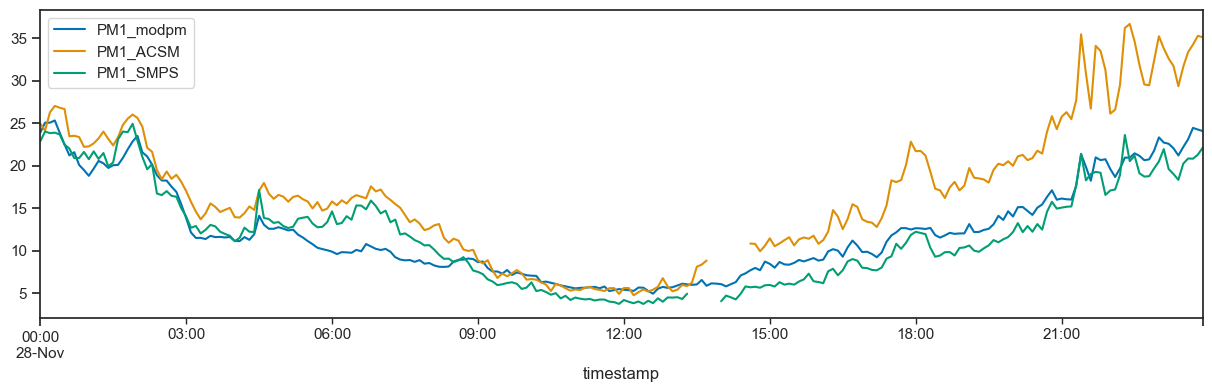

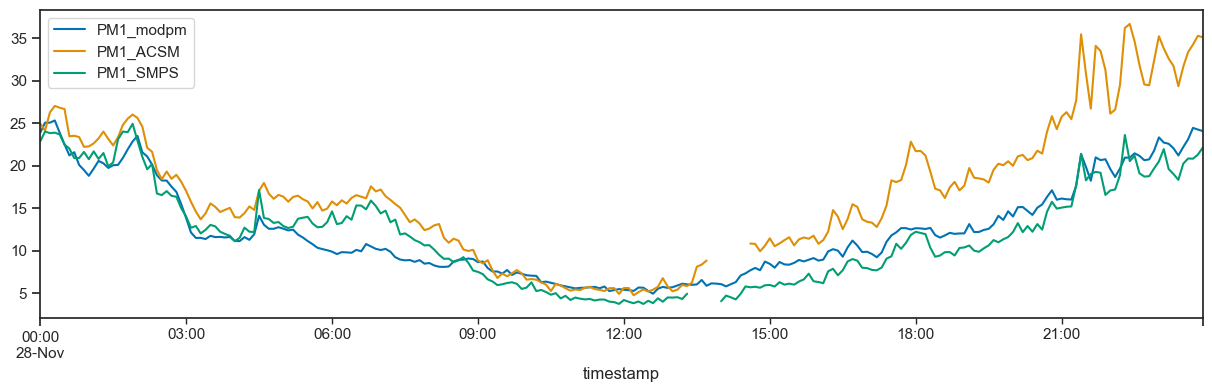

In [23]:
tmp4 = tmp.loc['2020-11-28':'2020-11-28',['PM1_modpm','PM1_SMPS', 'PM1_ACSM']]
tmp4[['PM1_modpm','PM1_ACSM','PM1_SMPS']].plot(figsize=(15,4)).get_figure()

#ACSM - 30min --> aligns much better

## Compare to Laura's Munged Output

### QuantAQ Files--> Outputs show they are the same

In [114]:
# folder = "/Users/zahrashivji/Dropbox/Shivji/Laura's Resources/B_Data-ES&T Roof/munged/OPC vs. nephelometer/"
# input_l = folder + "MODPM-6min.csv"
# df_l = dd.read_csv(input_l, parse_dates = ['timestamp']).compute()

# folder = "/Users/zahrashivji/Dropbox/Shivji/Final Data/Outdoor Files/"
# input_z = folder + "MODPM-final-6min.csv"
# df_z = dd.read_csv(input_z, parse_dates = ['timestamp_local']).compute()

In [109]:
# df = df_l[["timestamp", "MODPM-pm1"]].where(abs(df_z["pm1"] - df_l["MODPM-pm1"]) > 1e-10 , other = np.nan)
# df = df.dropna()
# df.shape[0]

,timestamp,MODPM-pm1


In [118]:
# import statsmodels.formula.api as smf

# tmp = df_l.copy(["timestamp"])
# tmp['pm1_l'] = df_l['MODPM-pm1']
# tmp['pm1_z'] = df_z['pm1']

# dat = tmp

# results = smf.ols("pm1_z ~ pm1_l",data=dat).fit()
# print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  pm1_z   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.082e+34
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:08:54   Log-Likelihood:             4.3714e+05
No. Observations:               13915   AIC:                        -8.743e+05
Df Residuals:                   13913   BIC:                        -8.743e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.661e-16      8e-17      8.332      0.0

### SMPS and ACSM files --> Output shows SMPS same

In [217]:
folder = "/Users/zahrashivji/Dropbox/Shivji/Laura's Resources/B_Data-ES&T Roof/munged/NMF Final-ARISense-Data/"
# input_l = folder + "4a-SMPS-6min-munged.csv"
# df_smps_l = dd.read_csv(input_l, parse_dates = ['timestamp']).compute()
# df_smps_l.set_index('timestamp',inplace=True)
# df_smps_l.index = df_smps_l.index.tz_localize(None)

input_l = folder + "4b-ACSM-6min-munged.csv"
df_acsm_l = dd.read_csv(input_l, parse_dates = ['timestamp']).compute()

,Sample #,Sample Temp (C),Sample Pressure (kPa),Mean Free Path (m),Gas Viscosity (Pa*s),Diameter Midpoint (nm),bin0,bin1,bin2,bin3,...,tf (s),D50 (nm),Median (nm),Mean (nm),Geo. Mean (nm),Mode (nm),Geo. Std. Dev.,Total Conc. (#/cm³),Title,Comment
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-11-05 00:00:00,107.0,23.0,101.3,6.730000e-08,0.000018,NaN,5.875,6.729,9.147,9.351,...,10.8,1000.0,77.415,91.691,78.210,71.050,1.754,8260.0,NaN,NaN
2020-11-05 00:06:00,108.0,23.0,101.3,6.730000e-08,0.000018,NaN,7.313,6.806,11.166,11.355,...,10.8,1000.0,70.652,88.369,74.232,51.397,1.788,8110.0,NaN,NaN
2020-11-05 00:12:00,109.0,23.0,101.3,6.730000e-08,0.000018,NaN,12.768,17.489,19.622,15.953,...,10.8,1000.0,76.184,91.031,76.573,79.148,1.800,7500.0,NaN,NaN
2020-11-05 00:18:00,110.0,23.0,101.3,6.730000e-08,0.000018,NaN,7.467,7.788,9.296,13.949,...,10.8,1000.0,83.020,97.312,82.519,73.653,1.788,6320.0,NaN,NaN
2020-11-05 00:24:00,111.0,23.0,101.3,6.730000e-08,0.000018,NaN,9.233,10.528,10.867,13.244,...,10.8,1000.0,84.628,98.450,82.851,88.168,1.816,5830.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 23:30:00,817.0,23.0,101.3,6.730000e-08,0.000018,NaN,43.795,40.226,32.237,29.388,...,10.8,1000.0,53.070,76.290,56.702,25.029,2.112,2540.0,NaN,NaN
2021-01-01 23:36:00,818.0,23.0,101.3,6.730000e-08,0.000018,NaN,45.563,37.177,48.429,53.832,...,10.8,1000.0,52.669,75.315,55.997,19.456,2.112,2590.0,NaN,NaN
2021-01-01 23:42:00,819.0,23.0,101.3,6.730000e-08,0.000018,NaN,49.196,39.204,43.767,47.557,...,10.8,1000.0,54.093,77.258,56.993,17.466,2.134,2620.0,NaN,NaN


In [226]:
# df = df_smps_l.where(abs(df2["Mean (nm)"] - df_smps_l["Mean (nm)"]) > 1e-10 , other = np.nan)
# df = df.dropna()
# df.shape[0]

0

In [218]:
import statsmodels.formula.api as smf

tmp = df_smps_l.copy(["timestamp"])
tmp['mean_l'] = df_smps_l['Mean (nm)']
tmp['mean_z'] = df2['Mean (nm)']

dat = tmp

results = smf.ols("mean_z ~ mean_l",data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 mean_z   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.172e+33
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:51:06   Log-Likelihood:             3.9805e+05
No. Observations:               13705   AIC:                        -7.961e+05
Df Residuals:                   13703   BIC:                        -7.961e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.441e-14   2.31e-15    -19.258      0.0